In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gaussian clustering libraries:
from sklearn.mixture import GaussianMixture
from matplotlib import cm

In [2]:
o_df = pd.read_csv('../../clean_data/top_overall_offensive_player_data.csv')

In [3]:
o_df.head()

,Rank,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPointsPerGame,FantasyPoints,Year
0,1,Patrick Mahomes,KC,QB,16,5097,50,12,272,2,0,0,0,2,26.1,417.08,2018
1,2,Matt Ryan,ATL,QB,16,4924,35,7,125,3,1,5,1,5,22.1,353.96,2018
2,3,Ben Roethlisberger,PIT,QB,16,5129,34,16,98,3,1,-1,0,2,21.3,340.86,2018
3,4,Deshaun Watson,HOU,QB,16,4165,26,9,551,5,0,0,0,3,20.7,331.70,2018
4,5,Andrew Luck,IND,QB,16,4593,39,15,148,0,1,4,0,1,20.4,326.92,2018


In [4]:
o_df['Position'].value_counts()

WR    476
RB    340
TE    187
QB    184
FB     13
Name: Position, dtype: int64

In [5]:
def color_positions(pos):
    if pos == 'WR':
        return 'red'
    if pos == 'RB':
        return 'blue'
    if pos == 'TE':
        return 'orange'
    if pos == 'QB':
        return 'green'
    if pos == 'FB':
        return 'yellow'
    else:
        return 'black'

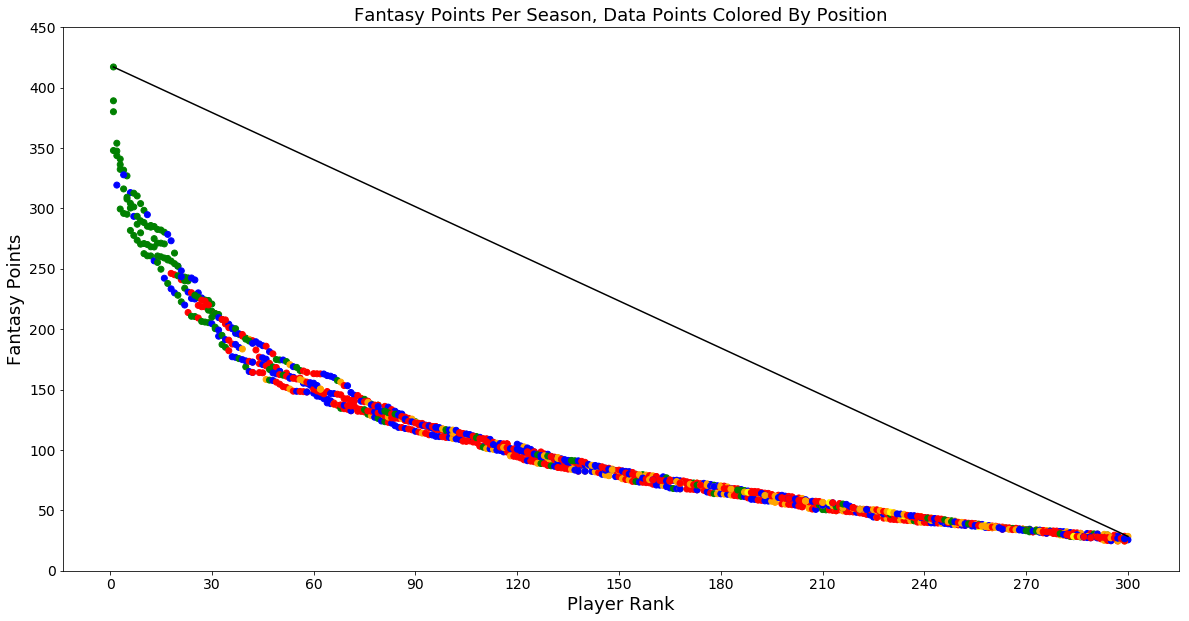

In [6]:
plt.figure(figsize = (20, 10))

plt.scatter(o_df['Rank'], o_df['FantasyPoints'], c = o_df['Position'].apply(color_positions))
plt.plot([o_df.loc[0]['Rank'], o_df.loc[299]['Rank']], 
         [o_df.loc[0]['FantasyPoints'], o_df.loc[299]['FantasyPoints']], color = 'black')

plt.title('Fantasy Points Per Season, Data Points Colored By Position', fontsize=18)
plt.ylabel('Fantasy Points', fontsize=18)
plt.xlabel('Player Rank', fontsize=18)
plt.xticks(np.arange(0, 301, step=30), size=14)
plt.yticks(np.arange(0, 451, step=50), size=14)
plt.savefig('../../images/initial_clustering_2015_2018.png')
plt.show();

In [7]:
o_18 = pd.read_csv('../../clean_data/best_o_players_2018_season.csv')
o_17 = pd.read_csv('../../clean_data/best_o_players_2017_season.csv')
o_16 = pd.read_csv('../../clean_data/best_o_players_2016_season.csv')
o_15 = pd.read_csv('../../clean_data/best_o_players_2015_season.csv')

In [8]:
o_18.head()

,Rank,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPointsPerGame,FantasyPoints,Year
0,1,Patrick Mahomes,KC,QB,16,5097,50,12,272,2,0,0,0,2,26.1,417.08,2018
1,2,Matt Ryan,ATL,QB,16,4924,35,7,125,3,1,5,1,5,22.1,353.96,2018
2,3,Ben Roethlisberger,PIT,QB,16,5129,34,16,98,3,1,-1,0,2,21.3,340.86,2018
3,4,Deshaun Watson,HOU,QB,16,4165,26,9,551,5,0,0,0,3,20.7,331.70,2018
4,5,Andrew Luck,IND,QB,16,4593,39,15,148,0,1,4,0,1,20.4,326.92,2018


In [9]:
def gauss_mix_plotter(df, col_1, col_2, clusters = 10, is_year = True):
    
    # Get the season year(s) from the DataFrame:
    try:
        year = df['Year'].unique()
    except:
        is_year = False
        
    # Create plot title for each subplot:
    if is_year:
        chart_2d_title = (f'{col_1} By {col_2} of {year} Season; 2-D Gaussian Clustering'.format(col_1, col_2, year))
        chart_1d_1_title = (f'{year} Season Fit To {col_1} Feature; 1-D Gaussian Clustering'.format(year, col_1))
        chart_1d_2_title = (f'{year} Season Fit To {col_2} Feature; 1-D Gaussian Clustering'.format(year, col_2))
    else:
        chart_2d_title = (f'{col_1} By {col_2}; 2-D Gaussian Clustering'.format(col_1, col_2))
        chart_1d_1_title = (f'Model Fit To {col_1} Feature; 1-D Gaussian Clustering'.format(col_1))
        chart_1d_2_title = (f'Model Fit To {col_2} Feature; 1-D Gaussian Clustering'.format(col_2))
        
    # Instantiate, fit, and predict 2-Dimensional GMM using both columns:
    g_mix_2d = GaussianMixture(n_components = clusters, random_state = 42)
    g_mix_2d.fit(df[[col_1, col_2]])
    g_mix_2d_cluster = g_mix_2d.predict(df[[col_1, col_2]])
    
    # Instantiate, fit, and predict 1-Dimensional GMM using the first column (col_1):
    g_mix_1d_1 = GaussianMixture(n_components = clusters, random_state = 42)
    g_mix_1d_1.fit(df[[col_1]])
    g_mix_1d_1_cluster = g_mix_1d_1.predict(df[[col_1]])
    
    # Instantiate, fit, and predict 1-Dimensional GMM using the second column (col_2):
    g_mix_1d_2 = GaussianMixture(n_components = clusters, random_state = 42)
    g_mix_1d_2.fit(df[[col_2]])
    g_mix_1d_2_cluster = g_mix_1d_2.predict(df[[col_2]])
    
    plt.figure(figsize = (15, 21))
    
    # Plot 2-D GMM clusters for both columns:
    plt.subplot(3,1,1) 
    plt.scatter(df[col_1], df[col_2], c = [cm.rainbow(clust/clusters) for clust in g_mix_2d_cluster])
    plt.title(chart_2d_title, fontsize=16)
    plt.xlabel(col_1, fontsize=16)
    plt.ylabel(col_2, fontsize=16)
    plt.xticks(np.arange(0, 301, step=30), size=14)
    plt.yticks(np.arange(0, 451, step=50), size=14)
    
    # Plot 1-D GMM clusters for col_1:
    plt.subplot(3,1,2) 
    plt.scatter(df[col_1], df[col_2], c = [cm.rainbow(clust/clusters) for clust in g_mix_1d_1_cluster])
    plt.title(chart_1d_1_title, fontsize=16)
    plt.xlabel(col_1, fontsize=16)
    plt.ylabel(col_2, fontsize=16)
    plt.xticks(np.arange(0, 301, step=30), size=14)
    plt.yticks(np.arange(0, 451, step=50), size=14)
    
    # Plot 1-D GMM clusters for col_2:
    plt.subplot(3,1,3) 
    plt.scatter(df[col_1], df[col_2], c = [cm.rainbow(clust/clusters) for clust in g_mix_1d_2_cluster])
    plt.title(chart_1d_2_title, fontsize=16)
    plt.xlabel(col_1, fontsize=16)
    plt.ylabel(col_2, fontsize=16)
    plt.xticks(np.arange(0, 301, step=30), size=14)
    plt.yticks(np.arange(0, 451, step=50), size=14)
    
    # Display the subplots:
    plt.show()
    
    col_1_name = '1D_cluster_' + str(col_1)
    col_2_name = '1D_cluster_' + str(col_2)
    both_cols = '2D_cluster_' + str(col_1) + '_' + str(col_2)
    
    df[col_1_name] = g_mix_1d_1_cluster
    df[col_2_name] = g_mix_1d_2_cluster
    df[both_cols] = g_mix_2d_cluster
    
    return df 

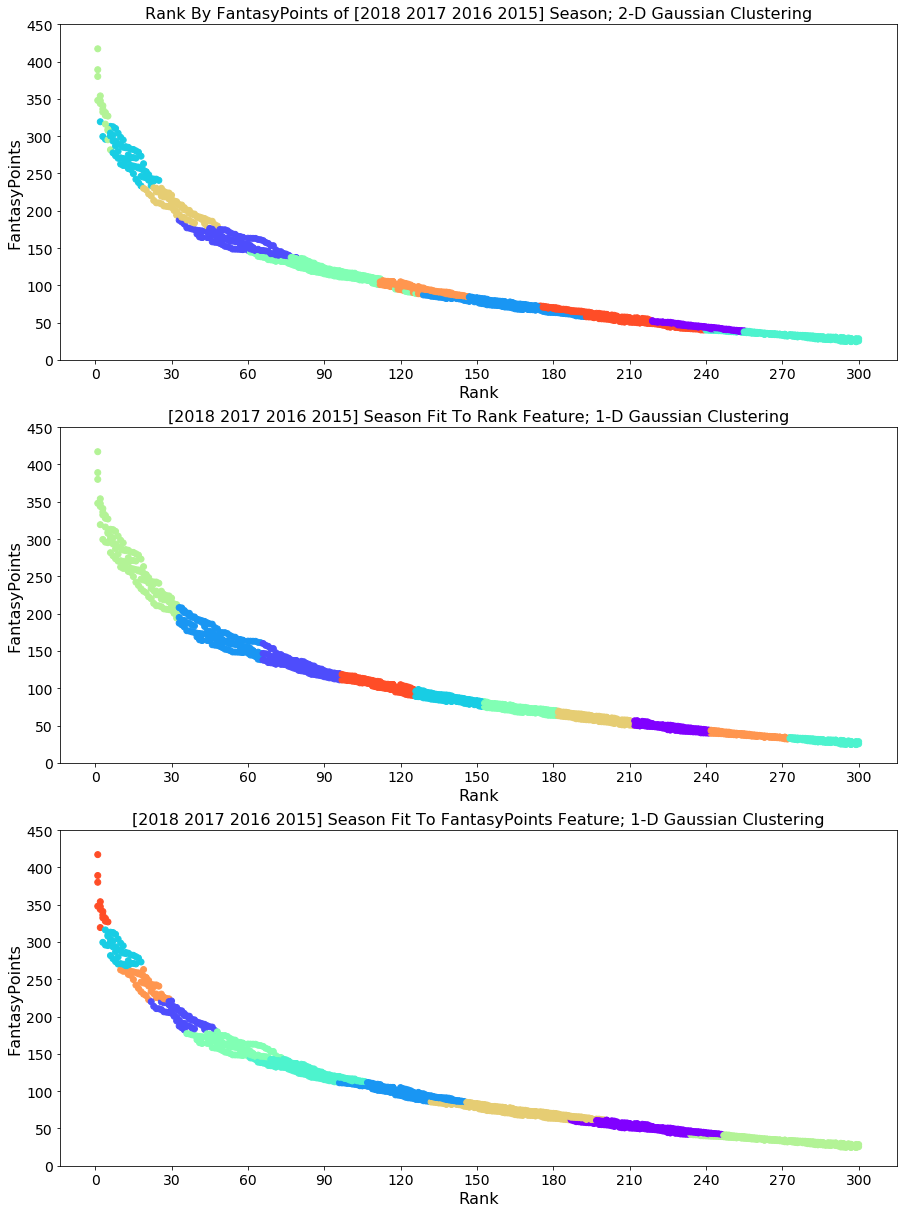

In [10]:
o_df = gauss_mix_plotter(o_df, 'Rank', 'FantasyPoints', 10)

In [11]:
o_df.head()

,Rank,Name,Team,Position,Played,PassingYards,PassingTouchdowns,PassingInterceptions,RushingYards,RushingTouchdowns,Receptions,ReceivingYards,ReceivingTouchdowns,FumblesLost,FantasyPointsPerGame,FantasyPoints,Year,1D_cluster_Rank,1D_cluster_FantasyPoints,2D_cluster_Rank_FantasyPoints
0,1,Patrick Mahomes,KC,QB,16,5097,50,12,272,2,0,0,0,2,26.1,417.08,2018,6,9,6
1,2,Matt Ryan,ATL,QB,16,4924,35,7,125,3,1,5,1,5,22.1,353.96,2018,6,9,6
2,3,Ben Roethlisberger,PIT,QB,16,5129,34,16,98,3,1,-1,0,2,21.3,340.86,2018,6,9,6
3,4,Deshaun Watson,HOU,QB,16,4165,26,9,551,5,0,0,0,3,20.7,331.70,2018,6,9,6
4,5,Andrew Luck,IND,QB,16,4593,39,15,148,0,1,4,0,1,20.4,326.92,2018,6,9,6


In [12]:
o_df['1D_cluster_Rank'].value_counts()

2    132
6    128
8    125
1    125
7    120
0    120
9    116
5    116
4    111
3    107
Name: 1D_cluster_Rank, dtype: int64

In [13]:
o_df['1D_cluster_FantasyPoints'].value_counts()

6    235
7    214
0    188
2    156
4    143
5    100
1     61
8     47
3     42
9     14
Name: 1D_cluster_FantasyPoints, dtype: int64

In [14]:
o_df['2D_cluster_Rank_FantasyPoints'].value_counts()

4    206
9    186
5    172
2    151
8    115
1    115
0     92
7     75
3     70
6     18
Name: 2D_cluster_Rank_FantasyPoints, dtype: int64

In [15]:
o_df.groupby('1D_cluster_Rank')[['Rank']].agg(['mean', 'std'])

Rank          
                       mean       std
1D_cluster_Rank                      
0                226.416667  8.741462
1                 81.080000  9.069267
2                 48.946970  9.536842
3                139.056075  7.737231
4                286.441441  7.962052
5                166.879310  8.403059
6                 16.500000  9.269372
7                196.391667  8.632843
8                256.984000  9.008047
9                111.181034  8.383834

In [16]:
o_df.groupby('1D_cluster_Rank')[['FantasyPoints']].agg(['mean', 'std'])

FantasyPoints           
                         mean        std
1D_cluster_Rank                         
0                   47.819667   3.803966
1                  130.193600  10.167985
2                  169.341515  17.412091
3                   87.121589   4.964123
4                   29.359279   2.502929
5                   72.997241   4.194798
6                  262.847344  44.149873
7                   60.184333   4.703339
8                   37.442720   2.840709
9                  105.372759   6.928398

In [17]:
o_df.groupby('1D_cluster_FantasyPoints')[['Rank']].agg(['mean', 'std'])

Rank           
                                mean        std
1D_cluster_FantasyPoints                       
0                         218.143617  14.556385
1                          34.213115   5.910766
2                         121.865385  12.323639
3                           9.738095   3.895335
4                          84.244755  11.331259
5                          54.020000   8.691084
6                         270.744681  17.335636
7                         167.836449  16.428716
8                          20.297872   4.736146
9                           2.428571   1.283881

In [18]:
o_df.groupby('1D_cluster_FantasyPoints')[['FantasyPoints']].agg(['mean', 'std'])

FantasyPoints           
                                  mean        std
1D_cluster_FantasyPoints                         
0                            51.066809   5.428683
1                           200.275410  11.503589
2                            98.097500   7.782793
3                           288.099048  14.227698
4                           126.865734   9.320301
5                           160.701600   9.415297
6                            33.527915   4.695354
7                            72.881869   6.955729
8                           242.160000  13.169115
9                           349.598571  27.567934

In [19]:
o_df.groupby('2D_cluster_Rank_FantasyPoints')[['Rank']].agg(['mean', 'std'])

Rank           
                                     mean        std
2D_cluster_Rank_FantasyPoints                       
0                              236.989130  10.206112
1                               56.095652  11.036601
2                              160.476821  13.655199
3                               13.828571   5.568991
4                              274.033981  15.782788
5                               90.982558  14.293692
6                                3.166667   1.653872
7                               32.653333   7.026001
8                              127.878261  10.101370
9                              202.854839  15.708335

In [20]:
o_df.groupby('2D_cluster_Rank_FantasyPoints')[['FantasyPoints']].agg(['mean', 'std'])

FantasyPoints           
                                       mean        std
2D_cluster_Rank_FantasyPoints                         
0                                 45.077391   3.871322
1                                158.545043  11.564859
2                                 75.143974   6.790313
3                                269.898571  22.390322
4                                 32.576699   4.197499
5                                120.614419  11.567470
6                                338.058889  33.109629
7                                205.557867  14.955699
8                                 94.782522   6.055156
9                                 57.562151   8.101073

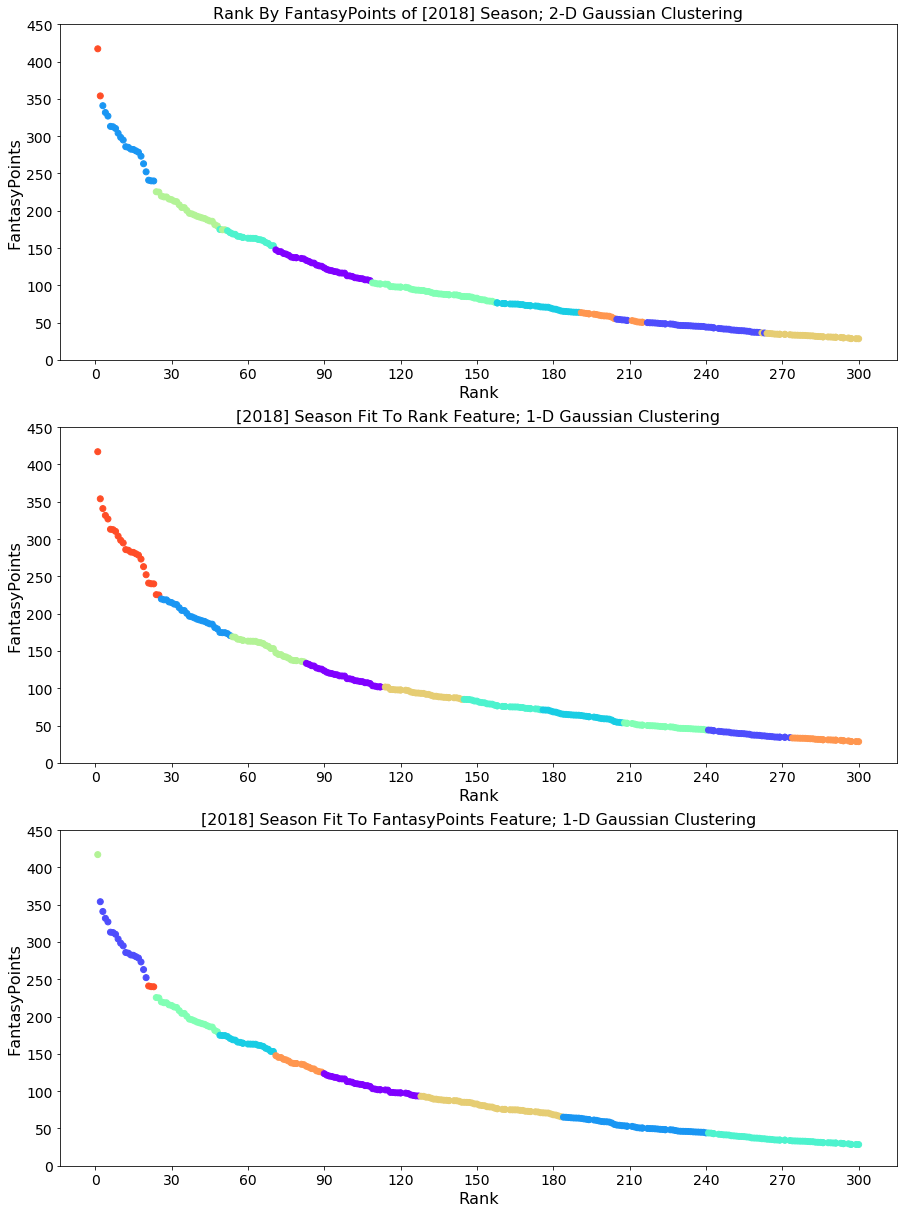

In [21]:
o_18 = gauss_mix_plotter(o_18, 'Rank', 'FantasyPoints', 10)

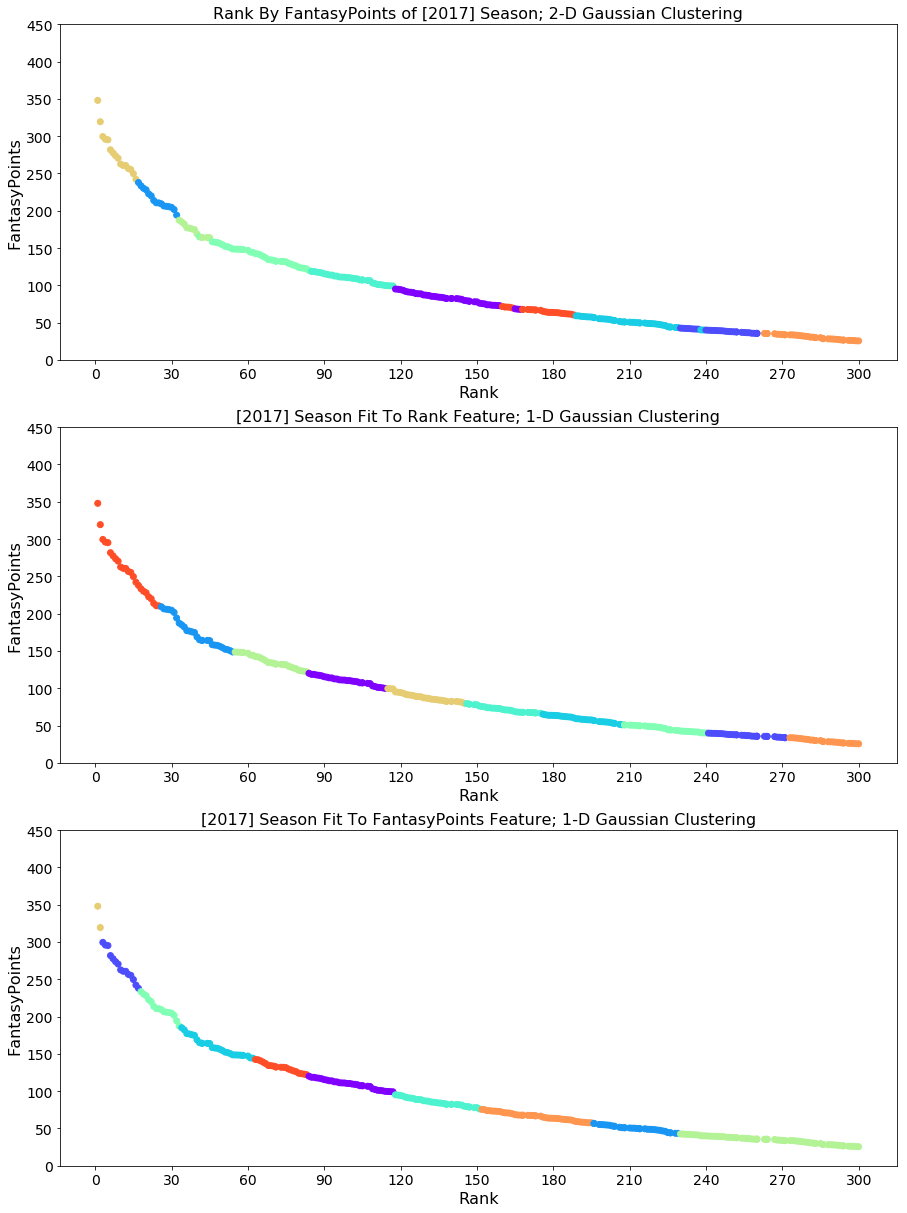

In [22]:
o_17 = gauss_mix_plotter(o_17, 'Rank', 'FantasyPoints', 10)

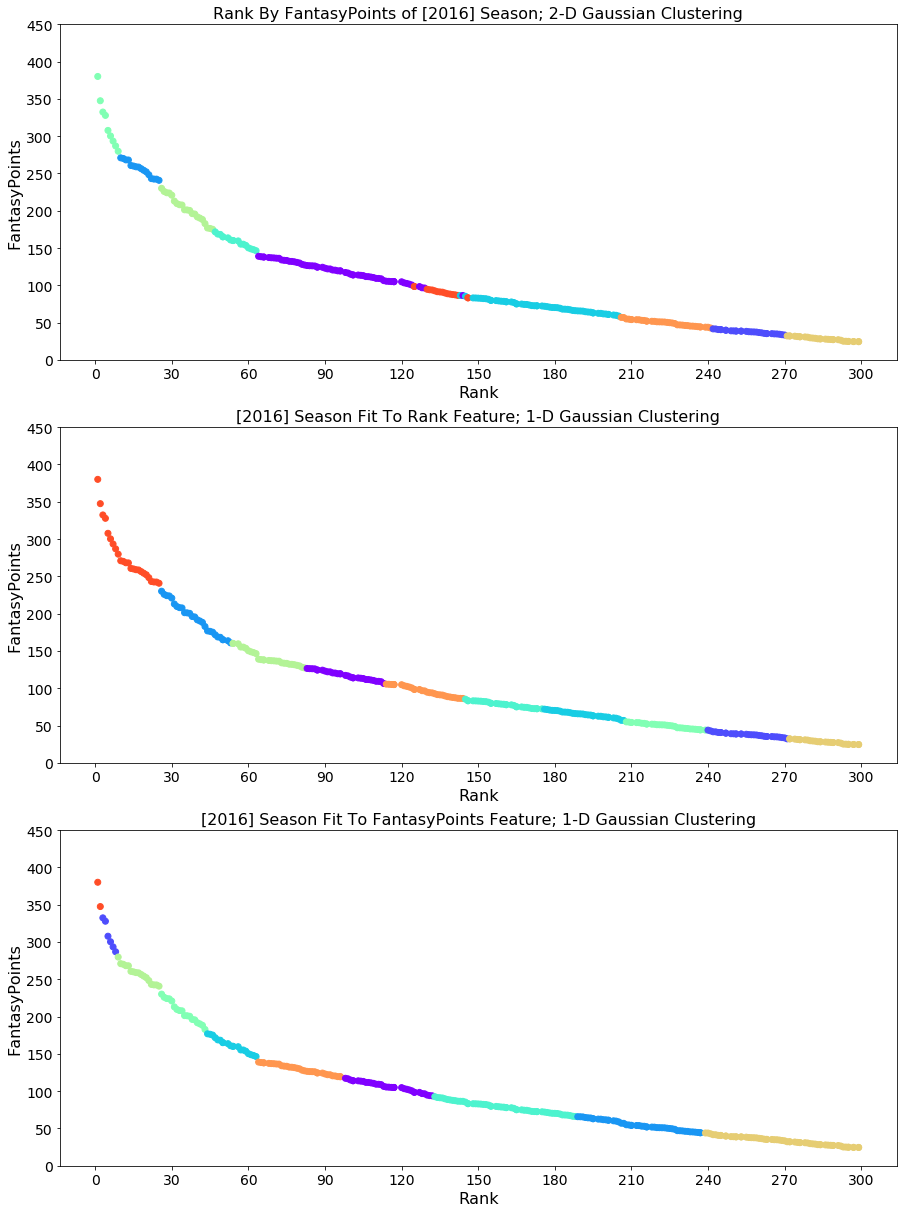

In [23]:
o_16 = gauss_mix_plotter(o_16, 'Rank', 'FantasyPoints', 10)

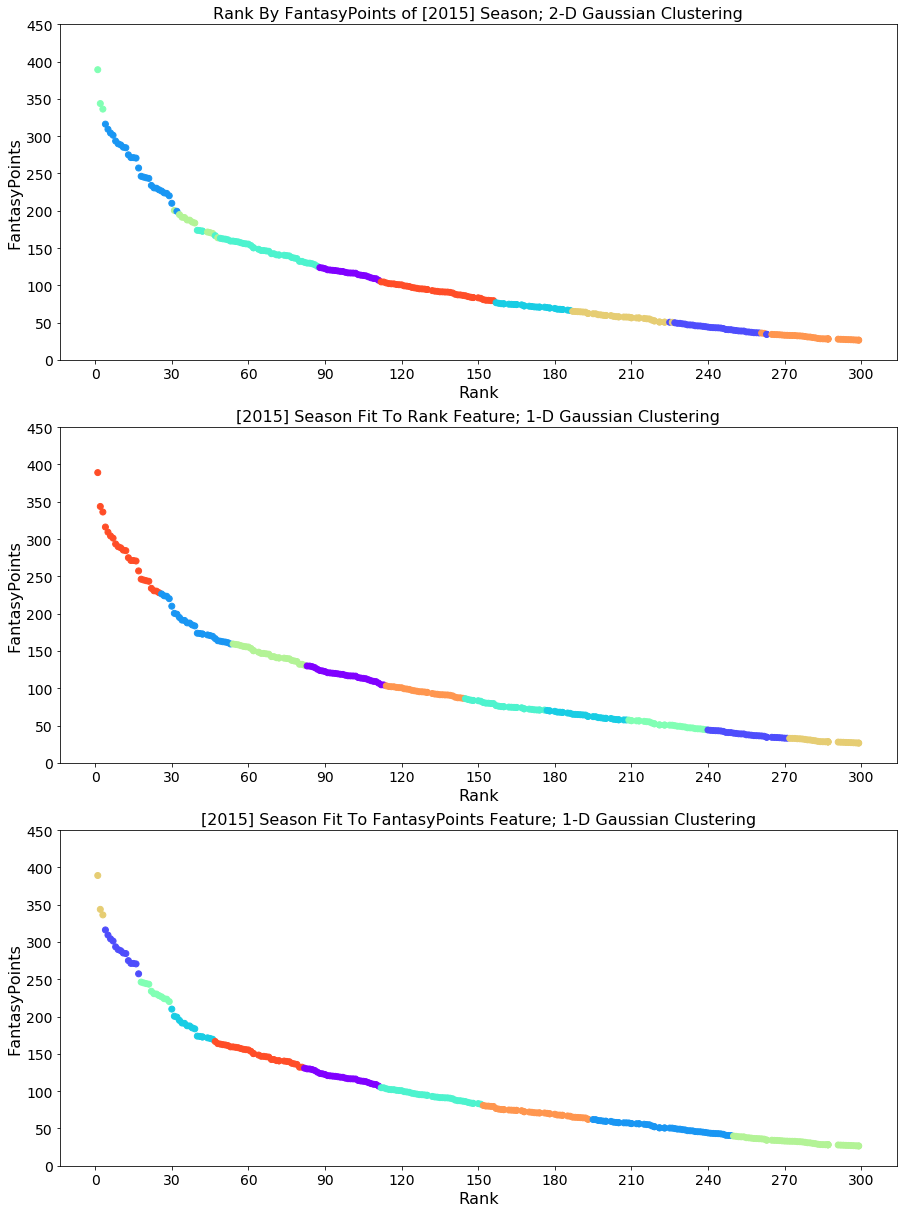

In [24]:
o_15 = gauss_mix_plotter(o_15, 'Rank', 'FantasyPoints', 10)